# Seventh Practice ML
In this practice, we will learn **Regularizations** and how to use **Ensembles** to get predictions from more than one model.  
We will also learn how to perform **Hyper-Parameters Search** and how to use the models **KNN** and **LWLR**.  
We will learn how to get code from other developers from [**PyPi**](https://pypi.org/) or [**GitHub**](https://github.com/) and use it in our work.  
We will also learn how to use **[AutoViz](https://github.com/AutoViML/AutoViz)** to show fast DataFrame graph reports.   

## PyPi  
![image](https://user-images.githubusercontent.com/41818563/101988649-93169a80-3ca3-11eb-9b74-dfe78400afb8.png)

The Python Package Index [(PyPI)](https://pypi.org/) is a repository of software for the Python programming language.  
PyPI helps you find and install software developed and shared by the Python community.  
Package authors use PyPI to distribute their software.


## GitHub
![image](https://user-images.githubusercontent.com/41818563/101965151-5784bd80-3c1c-11eb-9f8b-4d190d8f9571.png)  

[GitHub](https://github.com/) is a code hosting platform for version control and collaboration.  
It lets you and others work together on projects from anywhere.  
It is also a common way to share the code you wrote with other developers.  
Sometimes, the regular packages we are using are not enough, and we want to use things that are not officially implemented yet.  
We can write them down ourselves, or search for implementations written by other developers.  
These implementations will mostly be hosted at GitHub.   
If we want to use them and their developers did not upload them to PyPi (to be downloaded easily with `pip`), we need to download them directly from their repositories in GitHub.  
We will use `git clone` to clone repositories into our machine.  
 

## Downloads, Imports, and Definitions

We update packages that their Colab version is too old.

In [1]:
!pip install --upgrade plotly
!pip install autoviz

     |████████████████████████████████| 13.2MB 5.0MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


We import our regular packages.

In [2]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Data Exploration

We use the Vinho Verde's [White Wines](https://www.kaggle.com/danielpanizzo/wine-quality) dataset.  

![Vinho-Verde-Wine](https://user-images.githubusercontent.com/41818563/101994194-2f06cd00-3cc9-11eb-8155-ea1c4e592280.jpg)

### Explanation
**Source**:  
*P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.*

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts).  
Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).  

**Relevant Information**:  
The dataset is related to white variants of the Portuguese "Vinho Verde" wine.  
Only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).  
These datasets can be viewed as a classification or regression task.  
The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).  


**white wine samples** - 4898.

**Number of Attributes** - 11 + output attribute

### Attribute information

**Input variables** (based on physicochemical tests):  

1. **fixed acidity** (tartaric acid - g / dm^3) - most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
2. **volatile acidity** (acetic acid - g / dm^3) - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.  
3. **citric acid** (g / dm^3) - found in small quantities, citric acid can add 'freshness' and flavor to wines.  
4. **residual sugar** (g / dm^3) - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter, and wines with greater than 45 grams/liter are considered sweet.  
5. **chlorides** (sodium chloride - g / dm^3) - the amount of salt in the wine.  
6. **free sulfur dioxide** (mg / dm^3) - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of the wine.  
7. **total sulfur dioxide** (mg / dm^3) - the amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.  
8. **density** (g / cm^3) - the density of water is close to that of water depending on the percent alcohol and sugar content.  
9. **pH** - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.  
10. **sulphates** (potassium sulphate - g / dm3) - a wine additive that can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.   
11. **alcohol** (% by volume) - the percent alcohol content of the wine.  

**Output variable** (based on sensory data):

12. **quality** (score between 0 and 10)  

![image](https://user-images.githubusercontent.com/41818563/101994098-70e34380-3cc8-11eb-93c4-0f6bd9c4e2f2.png)  

Let's download the dataset from Github and explore it with Pandas tools.  

In [3]:
# download whitewines.csv file from Github 
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/whitewines.csv

--2020-12-21 01:13:46--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/whitewines.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [text/plain]
Saving to: ‘whitewines.csv’

whitewines.csv      100%[===================>] 258.23K  --.-KB/s    in 0.04s   

2020-12-21 01:13:47 (6.52 MB/s) - ‘whitewines.csv’ saved [264426/264426]



In [4]:
# load the whitewines csv file
whitewines_df = pd.read_csv('/content/whitewines.csv')
whitewines_df

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.0              0.27         0.36  ...       0.45      8.8        6
1               6.3              0.30         0.34  ...       0.49      9.5        6
2               8.1              0.28         0.40  ...       0.44     10.1        6
3               7.2              0.23         0.32  ...       0.40      9.9        6
4               7.2              0.23         0.32  ...       0.40      9.9        6
...             ...               ...          ...  ...        ...      ...      ...
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  ...       0.38     12.8        7
4897            6.0              0.21         0.38  ...       0.32     11.8        6

[4898 rows x 12 columns]

In [5]:
# show whitewines_df info
whitewines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
# show whitewines_df description
whitewines_df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        6.854788          0.278241  ...    10.514267     5.877909
std         0.843868          0.100795  ...     1.230621     0.885639
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.300000          0.210000  ...     9.500000     5.000000
50%         6.800000          0.260000  ...    10.400000     6.000000
75%         7.300000          0.320000  ...    11.400000     6.000000
max        14.200000          1.100000  ...    14.200000     9.000000

[8 rows x 12 columns]

We can also use `autoviz` to show a report on the data.  
This report is based on graphs other than text.  

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (4898, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  11
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0

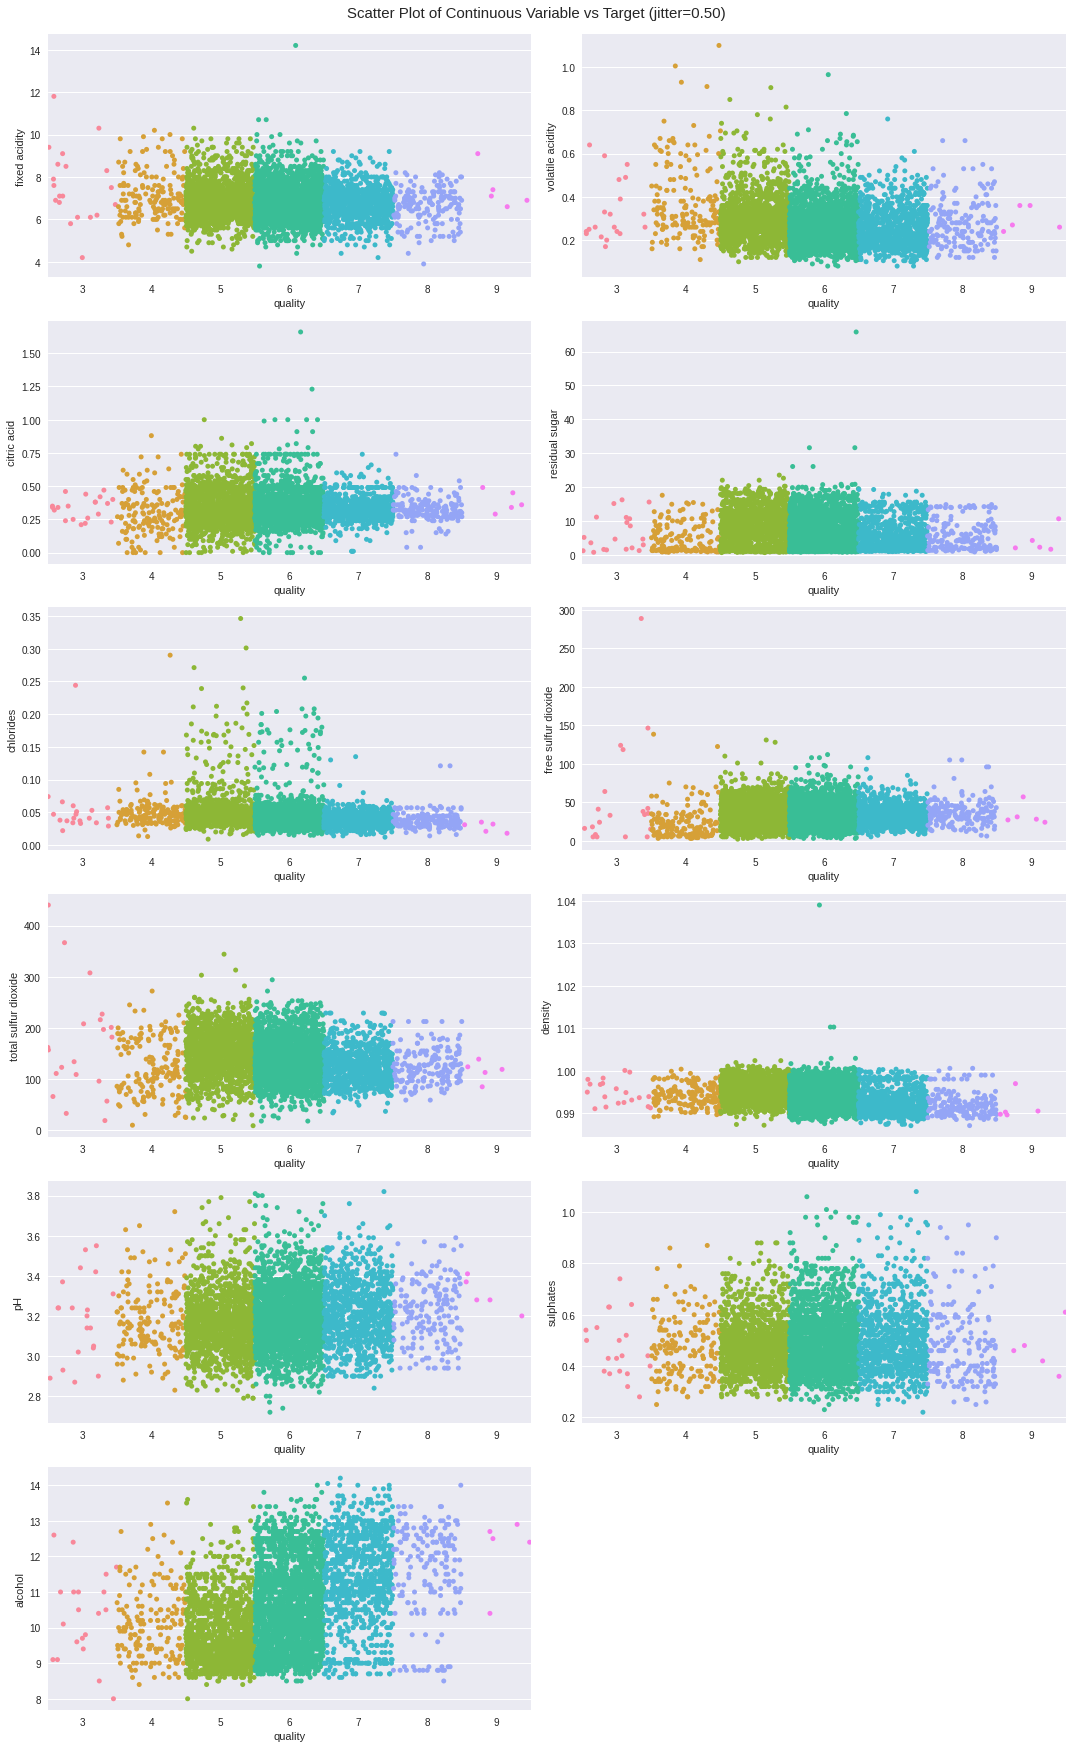

Total Number of Scatter Plots = 66


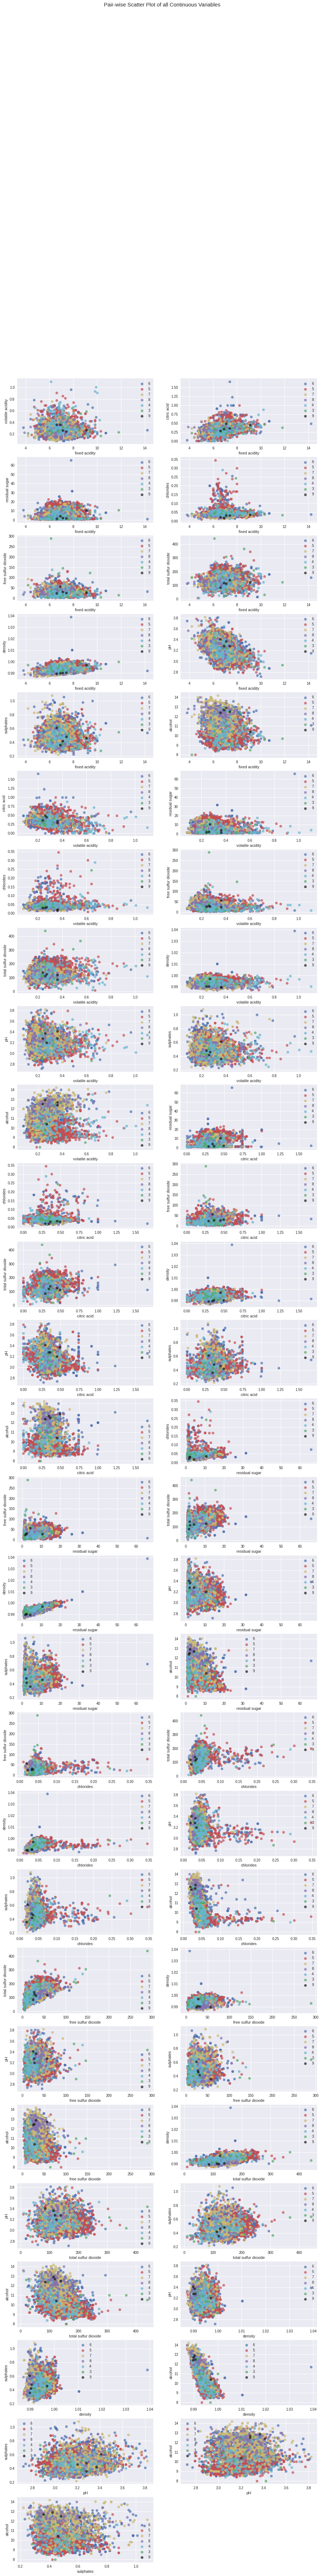

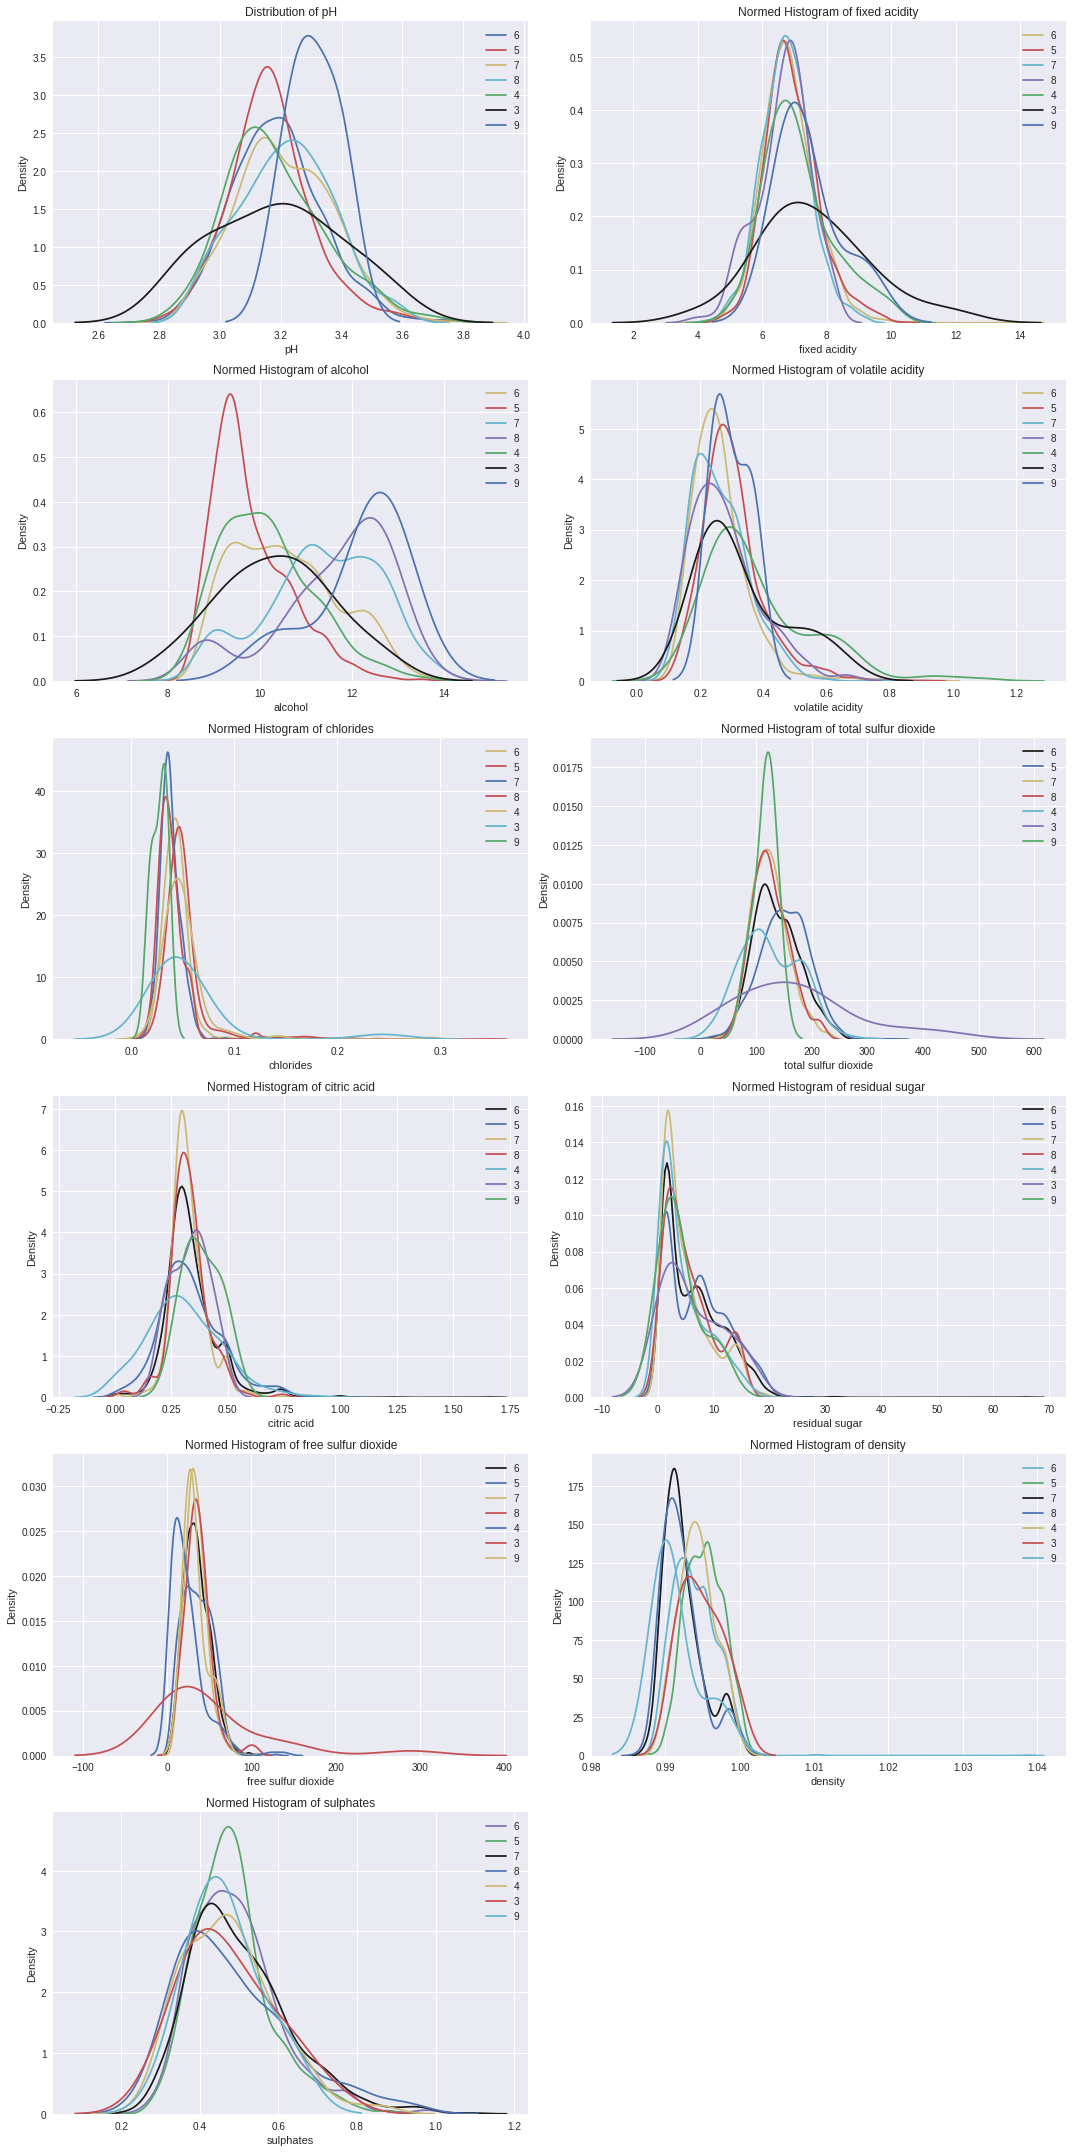

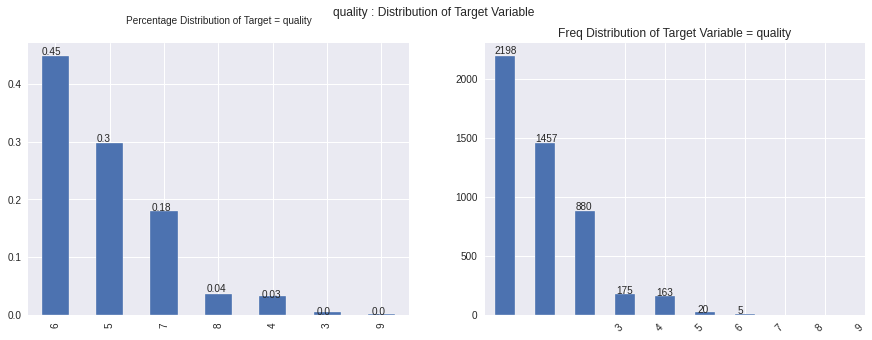

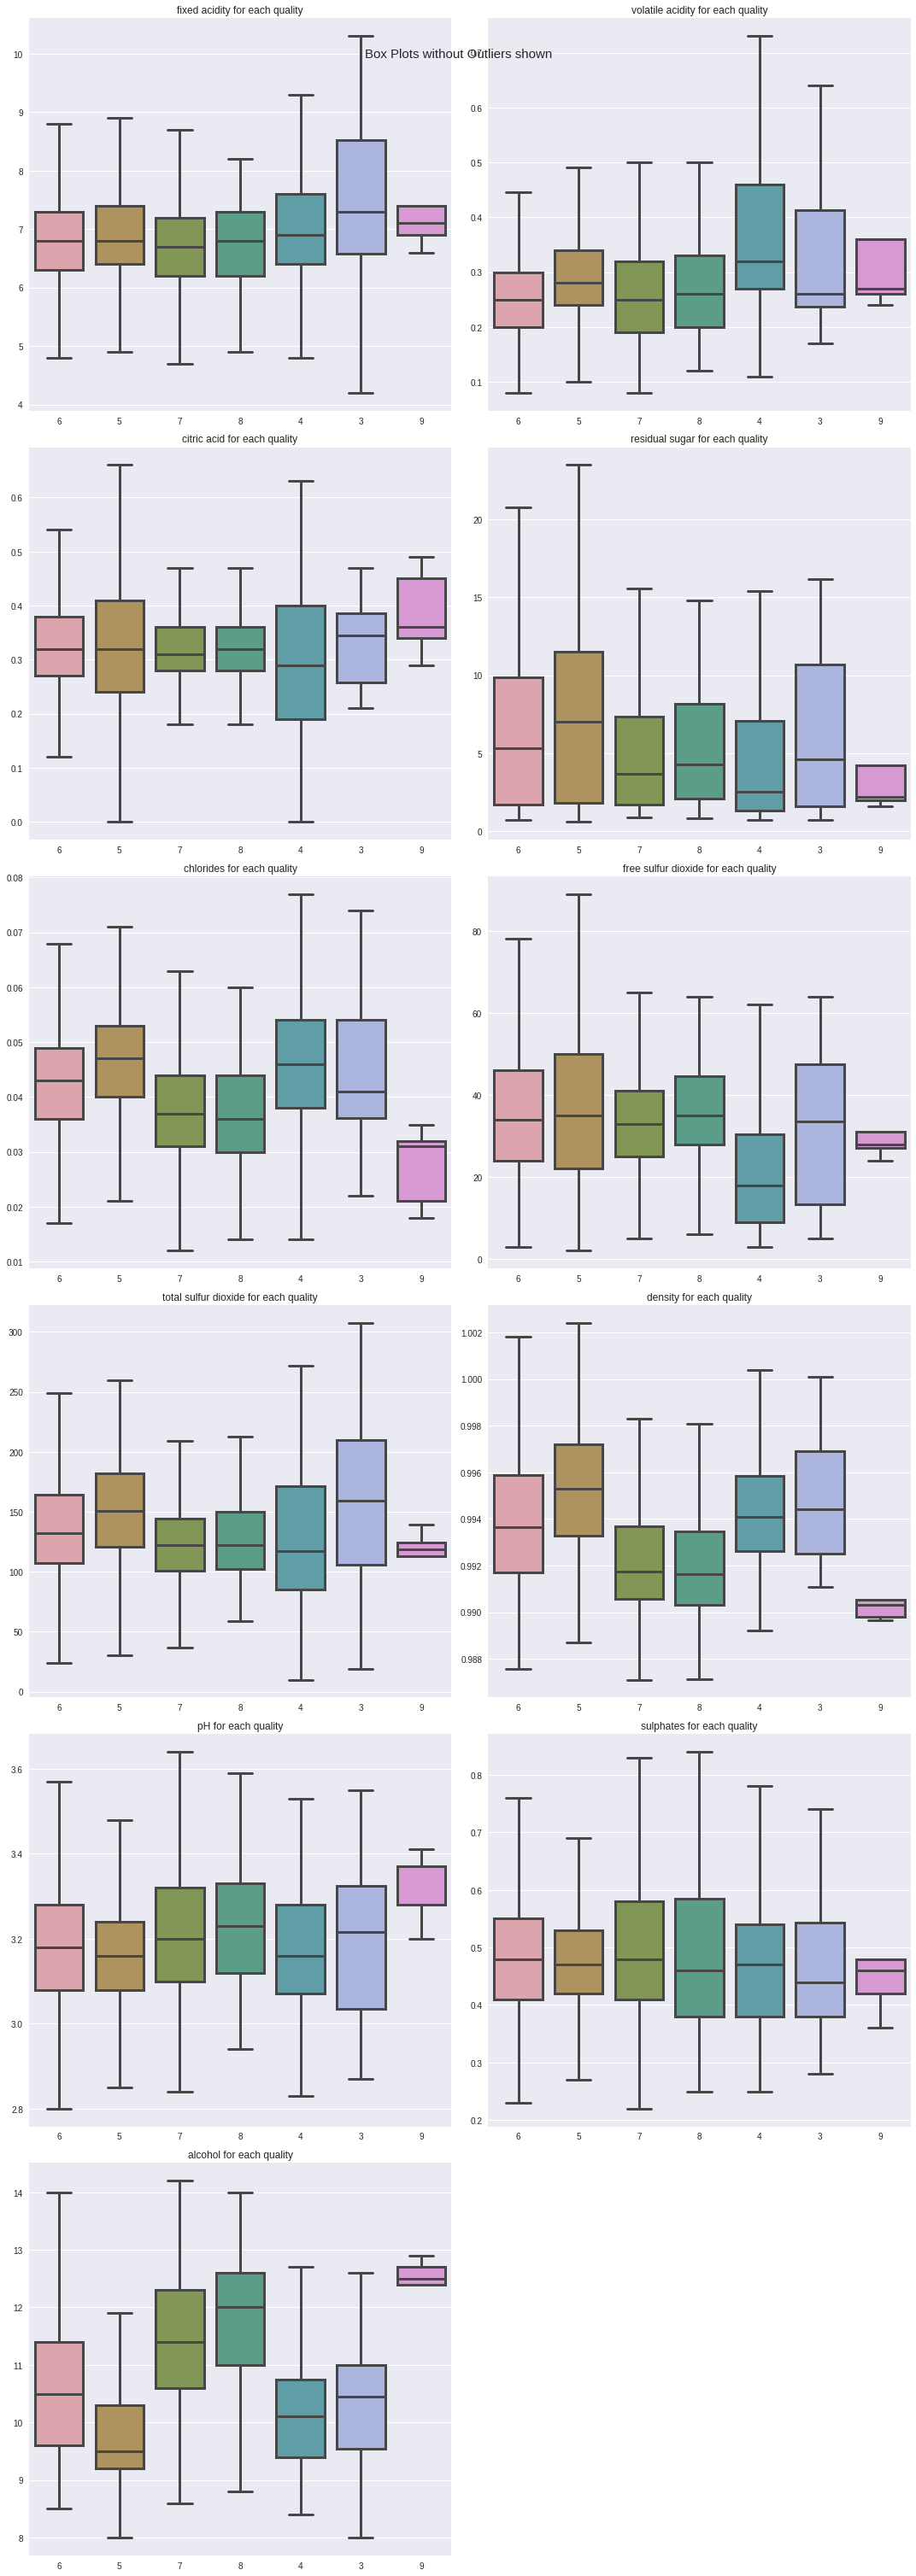

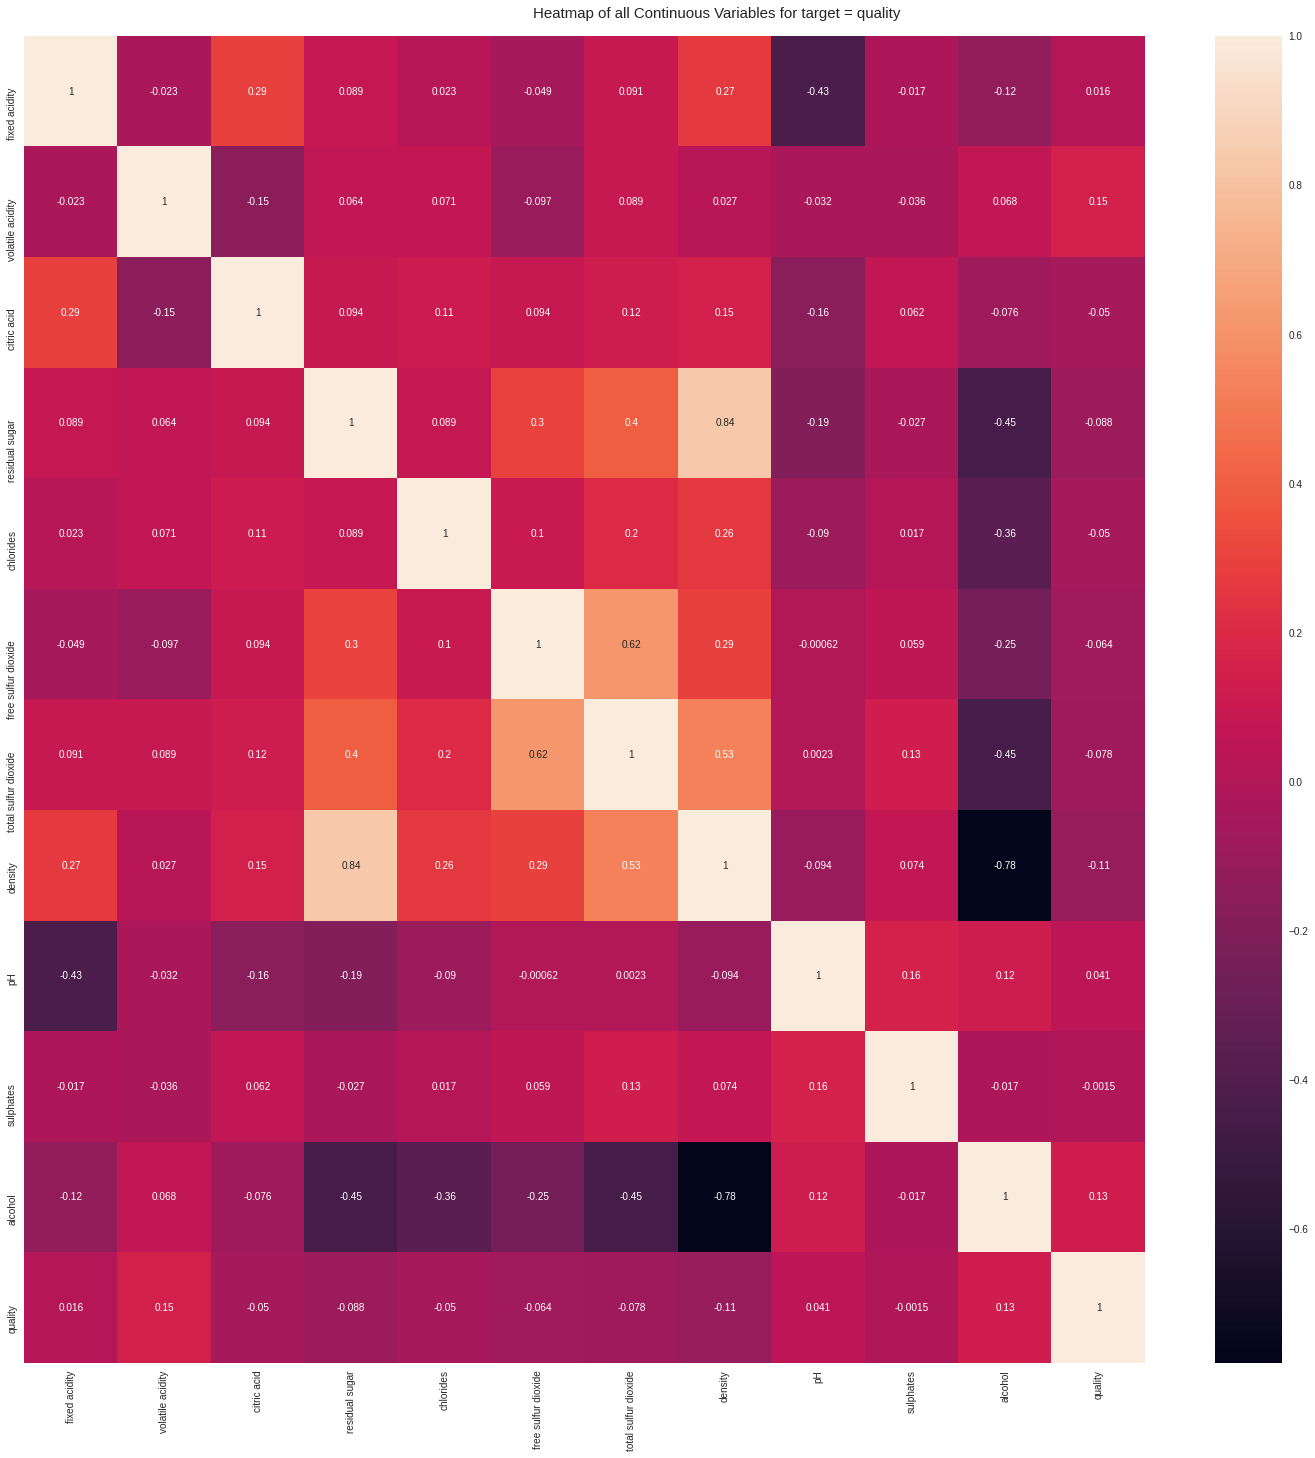

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 41.473

 ###################### VISUALIZATION Completed ########################


In [7]:
#  import autoviz and show report on usedcars_df
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
dft = AV.AutoViz("", depVar='quality', dfte=whitewines_df, verbose=1)

In [8]:
# divide the data to features and target
t = whitewines_df['quality'].copy()
X = whitewines_df.drop(['quality'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64


X


fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
2               8.1              0.28         0.40  ...  3.26       0.44     10.1
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4898 rows x 11 columns]

Let's see how many different scores we have in the target.  

In [9]:
t.unique()

array([6, 5, 7, 8, 4, 3, 9])

We can see that we have only 7 different scores (ordinal target).  
We can try to use regression models and classification models on this dataset.

## Regularization

![image](https://user-images.githubusercontent.com/41818563/102110352-b70de380-3e3d-11eb-89d7-3cc9b8d89c09.png)

When we have a case of High-Variance, we can use Regularizations, to reduce it.  
With regularization, we can control the size of the model weights and thus control the variance.  
We control the size of the model weights by adding a term to the loss function.  
This term is called a *penalty* to high weights.  

We have learned about three regularization techniques:
1. L1 (also called Lasso).
2. L2 (also called Ridge).
3. Elastic Net (a combination of Lasso and Ridge).

### **L1 - Lasso**
![1_4MlW1d3xszVAGuXiJ1U6Fg](https://user-images.githubusercontent.com/41818563/102109895-3a7b0500-3e3d-11eb-8d40-ea305a92e174.png)  
The penalty is fixed for every weight.  
It is going up or down with fixed-size steps.  
The unnecessary weights tend to get to zero (it is practically feature selection).  

### **L2 - Ridge**
![image](https://user-images.githubusercontent.com/41818563/102110620-0fdd7c00-3e3e-11eb-8a4d-ffd874660cf2.png)  
When the weights are big, this penalty adds big numbers to the loss function and thus reducing the weights by a lot.  
When the weights are small, this penalty adds small numbers to the loss function and thus reducing the weights a little bit.  
The weights that are unnecessary still stays in the model (but with small values).  

![image](https://user-images.githubusercontent.com/41818563/102113309-8e87e880-3e41-11eb-992e-7568048d3554.png)  

### **ElasticNet** 
![image](https://user-images.githubusercontent.com/41818563/102110709-28e62d00-3e3e-11eb-8dc5-3c603a990b3e.png)   
Combination of L1 (Lasso) and L2 (Ridge).  

![image](https://user-images.githubusercontent.com/41818563/102111304-df4a1200-3e3e-11eb-94cc-63033686e021.png)  


We can use these regularizations as Hyper-Parameters in Scikit-learn [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) and [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).  
Wen can also use regular GD with Scikit-learn [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).    

Let's start with SGDRegressor.  

In [10]:
# print lasso, ridge and elasticnet scores as regression 
from sklearn.model_selection import cross_val_score

sgd_lasso_reg = SGDRegressor(penalty='l1', random_state=1)
sgd_ridge_reg = SGDRegressor(penalty='l2', random_state=1)
sgd_elastic_reg = SGDRegressor(penalty='elasticnet', random_state=1)

print("R2 score for regression:")
print('sgd_lasso', cross_val_score(make_pipeline(StandardScaler(), sgd_lasso_reg), X, t, cv=15).mean())
print('sgd_ridge', cross_val_score(make_pipeline(StandardScaler(), sgd_ridge_reg), X, t, cv=15).mean())
print('sgd_elastic', cross_val_score(make_pipeline(StandardScaler(), sgd_elastic_reg), X, t, cv=15).mean())

R2 score for regression:
sgd_lasso 0.24338626485383555
sgd_ridge 0.24338463447414035
sgd_elastic 0.24339760603675203


Let's check the accuracy score of the regression models.  
We can do it with Scikit-learn [make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).  

In [11]:
# create accuracy score for ordinal predictions
from sklearn.metrics import make_scorer, accuracy_score

def get_accurate_ordinal_preds_from_numeric_preds(preds, min=None, max=None):
    if min is None:
        min = round(min(preds))
    if max is None:
        max = round(max(preds))
    preds = np.asarray(preds).ravel()
    return np.array([round(p) if min <= p and p <= max else min if p < min else max for p in preds])

def accuracy_for_ordinal(y, y_pred):
    min_ord = min(y)
    max_ord = max(y)
    y_pred_ord = get_accurate_ordinal_preds_from_numeric_preds(y_pred, min=min_ord, max=max_ord)
    return accuracy_score(y, y_pred_ord)

print("Accuracy score for regression:")
print('sgd_lasso', cross_val_score(make_pipeline(StandardScaler(), sgd_lasso_reg), X, t, cv=15, scoring=make_scorer(accuracy_for_ordinal)).mean())
print('sgd_ridge', cross_val_score(make_pipeline(StandardScaler(), sgd_ridge_reg), X, t, cv=15, scoring=make_scorer(accuracy_for_ordinal)).mean())
print('sgd_elastic', cross_val_score(make_pipeline(StandardScaler(), sgd_elastic_reg), X, t, cv=15, scoring=make_scorer(accuracy_for_ordinal)).mean())

Accuracy score for regression:
sgd_lasso 0.5188189089635591
sgd_ridge 0.518818283584423
sgd_elastic 0.5190227825619281


Let's try the classification approach and use SGDClassifier.  

In [12]:
# print lasso, ridge and elasticnet scores as classification 
sgd_lasso_cls =SGDClassifier(penalty='l1', random_state=1)
sgd_ridge_cls = SGDClassifier(penalty='l2', random_state=1)
sgd_elastic_cls = SGDClassifier(penalty='elasticnet', random_state=1)

print("Accuracy score for classification:")
print('sgd_lasso', cross_val_score(make_pipeline(StandardScaler(), sgd_lasso_cls), X, t, cv=15).mean())
print('sgd_ridge', cross_val_score(make_pipeline(StandardScaler(), sgd_ridge_cls), X, t, cv=15).mean())
print('sgd_elastic', cross_val_score(make_pipeline(StandardScaler(), sgd_elastic_cls), X, t, cv=15).mean())

Accuracy score for classification:
sgd_lasso 0.4877738378892203
sgd_ridge 0.4798208914154206
sgd_elastic 0.4949325528601715


We can see that the classifiers predicted here worse than the regressors.  
We can try and create [ordinal classifiers](https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c) that will use the fact that there is an order to the labels.  
We will not do it here - try it yourself.  

## Hyper-Parameters Search

Most of our models have a lot of parameters that can be adjusted.  
Each parameter value can make our model better (or worse).  
We want to be able to find the best hyperparameters for our models.  
We have two approaches:  
1. Grid Search
2. Random Search

### Grid Search
When we want to check every parameter possible, we will use Grid Search.  
We will try all combinations of parameters and find the best one, that gives us the best score.  
This may be a little exhaustive, especially when we want to check a lot of parameters and values.  

### Random Search
We can choose to get random combinations of parameters and check the score on them.  
This will not be as accurate as Grid Search, but it will take less time.

Let's use Scikit-learn [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).  

In [13]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

X_normalized = StandardScaler().fit_transform(X)
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1]}

gs_model = GridSearchCV(SGDClassifier(random_state=1), hyper_parameters).fit(X_normalized, t)
print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for classification:
gs_model 0.5149144274665944
best params {'alpha': 0.001, 'penalty': 'elasticnet'}


We can see that the best parameters on this model (obtained with Grid Search) were `penalty=elasticnet` and `alpha=0.001`.  
It may change with a different `random_state`.  

Now let's try Scikit-learn [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).  
We will use Scipy [stats.uniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html) to get uniformly randomize values of `alpha`.  
We will use Numpy [random.seed](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html) to make sure that we get the same result each time we run this cell.  

In [14]:
# train with random search and get best parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'])

rs_model = RandomizedSearchCV(SGDClassifier(), distributions, random_state=1).fit(X_normalized, t)
print('Accuracy score for classification:')
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

Accuracy score for classification:
rs_model 0.4971491109211815
best params {'alpha': 0.417022004702574, 'penalty': 'l2'}


The best parameters on this model (obtained with Random Search) were `penalty=l2` and `alpha=0.417022004702574`.  
The Accuracy score of the Randomized Search is a little less than the score of the Grid Search, but it may change with a different random seed.  

## Ensembles

We can use a collection of models to make more accurate predictions and lower the variance.  
If we use regression, we can take the mean of all the predictions of the models.  
If we use classification, we can take the mean of all the probabilities of the model or choose the class that most of the models chose for some sample.  
It is like "The wisdom of the crowd".  
One model may be wrong, but a lot of different models are less prone to errors.  

We are going to use two types of ensembles:
1. Bagging (with NFold or with Bootstrap).
2. Boosting.

### Bagging
We create a few bags of samples from the original dataset.  
We train a model on each of the bags of samples, and we return the combined score.

The bags can be created using NFold (same as KFold CV).  
we simply divide the data into N parts and use KFold CV (where `K=N`).  
We save all the N (or K) models and use them as an ensemble.  

The bags can be created using Bootstrap.  
We draw samples out of the dataset (with replacement) and train the model on each group of samples.  
We save all the models and use them as an ensemble.  

### Boosting
We create a model and train it on the data.  
We take the samples that the model predicted incorrectly and multiply them (thus giving them more weight in the next training).  
We do this until we have few models, each of them is an expert on some type of samples.  
We combine all the model's predictions and return a combined score.  
There are few boosting algorithems ([AdaBoost](https://www.youtube.com/watch?v=LsK-xG1cLYA&ab_channel=StatQuestwithJoshStarmer), [GradientBoost](https://www.youtube.com/watch?v=3CC4N4z3GJc&ab_channel=StatQuestwithJoshStarmer), etc.).  

Let's start with Scikit-learn [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).  
When we use it with `bootstrap=False` we will address it as NFold, and when we use it with `bootstrap=True` we will address it as Bootstrap.  
Let's start with NFold Bagging.  

In [15]:
# get score with nfold bagging
from sklearn.ensemble import BaggingClassifier

bag_fold_model = BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=20, random_state=1, bootstrap=False).fit(X_normalized, t)
print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model.score(X_normalized, t).mean())

Accuracy score for classification:
bag_fold_model 0.5253164556962026


Let's try the Bootstrap Bagging.  

In [16]:
# get score with bootstrap bagging
bag_boot_model = BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=20, random_state=1, bootstrap=True).fit(X_normalized, t)
print('Accuracy score for classification:')
print('bag_boot_model', bag_boot_model.score(X_normalized, t).mean())

Accuracy score for classification:
bag_boot_model 0.5236831359738668


In our case, NFold Bagging got better results but the difference is small and it may change if we use bigger `n_estimators`.   

Let's try AdaBoosting.   

In [17]:
# get score with ada boosting
from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier(n_estimators=100, random_state=1).fit(X_normalized, t)
print('Accuracy score for classification:')
print('ada_boost_model', ada_boost_model.score(X_normalized, t).mean())

Accuracy score for classification:
ada_boost_model 0.4328297264189465


In our case, the bagging ensemble performs best.   

## LWLR

We can use a special form of Linear Regression.  
This form is called *Locally Weighted Linear Regression*.  
This is the equation:  
![image](https://user-images.githubusercontent.com/41818563/102151589-d1ff4880-3e7b-11eb-9168-61f653643fd2.png)  
We can see that we added a weight (beta) for every sample.  
This weight can help us emphasize the importance of the samples that are similar to our test sample.  
For every test sample, we train the model from scratch and give each training sample a weight that is corresponding to the distance from the test sample.  
We can use the Gaussian function as weight:  
![image](https://user-images.githubusercontent.com/41818563/102151833-69649b80-3e7c-11eb-92f1-d303fb4b56e5.png)  
If tao is small, only closer samples are taking into consideration in the WMSE (big distances get small weight (beta)).  
If tao is big, we get our regular MSE (big distances affect as much as small distances).  
![image](https://user-images.githubusercontent.com/41818563/102152277-52727900-3e7d-11eb-81f2-68fbf5294817.png)  

Scikit-learn does not have LWLR in its arsenal, so we need to use a [packege from GitHub](https://github.com/qiaochen/CourseExercises).  
This package is not stored in PyPi, so we can not download it with `pip install`.  
We need to use `git clone` .  

In [18]:
# clone the lwlr repo from github
!git clone https://github.com/qiaochen/CourseExercises

Cloning into 'CourseExercises'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 24 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


Let's check the LWLR model with `k=1`.  

In [19]:
# get cv score for lwlr with k=1
from CourseExercises.lwlr import LWLR

arr_X_normalized = np.asarray(X_normalized)
print('R2 score for regression:')
print('lwlr', cross_val_score(LWLR(k=1), arr_X_normalized, t, cv=5, scoring='r2').mean())
print()
print('Accuracy score for regression:')
print('lwlr', cross_val_score(LWLR(k=1), arr_X_normalized, t, cv=5, scoring=make_scorer(accuracy_for_ordinal)).mean())

R2 score for regression:
lwlr 0.20461186304463705

Accuracy score for regression:
lwlr 0.5271624523149402


Let's get the best `k` for the LWLR model.  
It may take some time (we are building the model from scratch for every test sample), so let's check how long it takes.   

In [20]:
%%time
# get best k for lwlr (show the calculation of this sell)
hyper_parameters = {'k': list(range(1, 10))}

gs_lw_model = GridSearchCV(LWLR(k=1), hyper_parameters, scoring='r2').fit(arr_X_normalized, t)
print('R2 score for regression:')
print('gs_lw_model', gs_lw_model.best_score_)
print('best params', gs_lw_model.best_params_)
print()
gs_lw_model = GridSearchCV(LWLR(k=1), hyper_parameters, scoring=make_scorer(accuracy_for_ordinal)).fit(arr_X_normalized, t)
print('Accuracy score for regression:')
print('gs_lw_model', gs_lw_model.best_score_)
print('best params', gs_lw_model.best_params_)

R2 score for regression:
gs_lw_model 0.32081021947494615
best params {'k': 3}

Accuracy score for regression:
gs_lw_model 0.5306318400700423
best params {'k': 3}
CPU times: user 6min 32s, sys: 4min 55s, total: 11min 27s
Wall time: 5min 55s


## KNN
We can take the idea we saw in LWLR to the extreme and create a model that predicts only based on the closest training samples to a test sample.  
This model is called *K Nearest Neighbors*.   
We can choose the `k` and the model will calculate the prediction for each test sample, based on the closest `k` training samples to the test sample.  
We need to determine what is the meaning of *close*.   
We need to use some sort of distance function to determine the closeness of each training sample to the test samples.  
We can use the [Euclidean distance
](https://en.wikipedia.org/wiki/Euclidean_distance):  
![image](https://user-images.githubusercontent.com/41818563/102157561-61125d80-3e88-11eb-88d5-940c86b25cbf.png)  
We can use KNN in classification tasks or regression tasks.  
When we use it in a regression task, we can take the mean of the target of all the neighbors.  
When we use it in a classification task, we can take the mean of the probability of all the neighbors, or we can use voting, and choose the label that got the most votes from the neighbors.  
We can choose to give all the neighbors that are in the decision group, the same weight in the vote, or we can give the closest neighbors higher weight than the farthest.  
![image](https://user-images.githubusercontent.com/41818563/102156353-0b3cb600-3e86-11eb-9308-beb8f5cd2c11.png)  
Let's use Scikit-learn [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).  

In [21]:
# run KNN on the dataset and find best K by accuracy
from sklearn.neighbors import KNeighborsClassifier

hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(n_neighbors=5), hyper_parameters).fit(arr_X_normalized, t)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

Accuracy score for classification:
gs_neigh_model 0.5044916720518647
best params {'n_neighbors': 16}


We can see that the best `n_neighbors` is `16`.  
let's try the Scikit-learn [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).    

In [22]:

# run KNN on the dataset and find best K by R2 and accuracy
from sklearn.neighbors import KNeighborsRegressor
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsRegressor(n_neighbors=5, weights='distance'), hyper_parameters).fit(arr_X_normalized, t)
print('R2 score for regression:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)
print()
gs_neigh_model = GridSearchCV(KNeighborsRegressor(n_neighbors=5, weights='distance'), hyper_parameters, scoring=make_scorer(accuracy_for_ordinal)).fit(arr_X_normalized, t)
print('Accuracy score for regression:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

R2 score for regression:
gs_neigh_model 0.27277425388148835
best params {'n_neighbors': 19}

Accuracy score for regression:
gs_neigh_model 0.5259358779262471
best params {'n_neighbors': 16}


The KNeighborsRegressor did better than the KNeighborsClassifier on this dataset.  
It might be due to the additional information it has on the order of the classes.  

## More Information  
Guide on how to upload python packeges to PyPi:  
[How to upload your python package to PyPi
](https://medium.com/@joel.barmettler/how-to-upload-your-python-package-to-pypi-65edc5fe9c56)

Explanation of few EDA libraries in python:  
[4 Libraries that can perform EDA in one line of python code
](https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae)  

Explanation of Vinho Verde wines:  
[Portuguese Vinho Verde wine: everything you need to know
](https://www.olivemagazine.com/drink/portuguese-vinho-verde-wine-guide/)  

Kaggle notebook on the white wine dataset:  
[KNN for classifying wine quality](https://www.kaggle.com/raultrevino/knn-for-classify-wine-quality)    

Kaggle notebook on the white wine dataset:  
[Predicting White Wine Quality
](https://www.kaggle.com/indra90/predicting-white-wine-quality)  

Explanation on Lowess smoothing:  
[Lowess Smoothing: Overview](https://www.statisticshowto.com/lowess-smoothing/)  

Explanation on regularization:  
[REGULARIZATION: An important concept in Machine Learning](https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea)

Article about the geometry of Ridge and Lasso regularizations:  
[Regularization and Geometry
](https://towardsdatascience.com/regularization-and-geometry-c69a2365de19)  

Explanation on Ridge, Lasso, and Elastic Net regularizations:  
[An Introduction to Ridge, Lasso, and Elastic Net Regression
](https://hackernoon.com/an-introduction-to-ridge-lasso-and-elastic-net-regression-cca60b4b934f)  


Explanation of the differences between Ridge and Lasso regularizations:   
[Intuitive and Visual Explanation on the differences between L1 and L2 regularization
](https://www.linkedin.com/pulse/intuitive-visual-explanation-differences-between-l1-l2-xiaoli-chen/)  

Guide on how to use regular classifier as an ordinal classifier:  
[Simple Trick to Train an Ordinal Regression with any Classifier
](https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c)  

A list of predefined scores for Sciking-learn:  
[Common cases: predefined scores](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)  

Explanation on LWLR and a code sample:  
[Linear Regression: How to overcome underfitting with Locally Weighted Linear Regression (LWLR)
](https://itnext.io/linear-regression-how-to-overcome-underfitting-with-locally-weight-linear-regression-lwlr-e867f0cde4a4)  

Example of LWLR in python:  
[Locally Weighted Linear Regression in Python](https://www.codespeedy.com/locally-weighted-linear-regression-in-python/)  

Short Explanation on LWLR:  
[ML | Locally weighted Linear Regression](https://www.geeksforgeeks.org/ml-locally-weighted-linear-regression/)  